In [ ]:
### Here we are going to import packages for our analysis
import nltk; nltk.download('stopwords')

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import itertools

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import os
import gensim
from gensim import corpora, models
import pandas as pd
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import nltk
import os
import nltk.stem as stemmer
from pprint import pprint
import itertools
import requests
import gensim
import pandas as pd
import os
import collections
import smart_open
from nltk.tokenize import RegexpTokenizer
import gensim.models.doc2vec
import multiprocessing
import numpy as np
from scipy.sparse import csr_matrix
import nltk.tokenize 
from gensim.models.doc2vec import TaggedDocument
import pickle
import seaborn as sns
from string import digits
from collections import namedtuple
import math
import matplotlib 
from datetime import timedelta
import matplotlib.pyplot as plt
import re
import pickle
import sys
import re
import csv
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance
from itertools import chain
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import sys
import numpy as np
from nltk.tokenize import RegexpTokenizer
from gensim import corpora, models
import gensim
import csv
from sklearn.externals import joblib
from string import digits
import bz2
from collections import Counter
import plotly
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
plotly.tools.set_credentials_file(username='alphonse.m.simon', api_key='tL4FDjpWNTU1xUf5sXEl')
from bs4 import BeautifulSoup
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.decomposition import PCA
import plotly.plotly as py
import plotly.graph_objs as go
import random
import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
stemmer = PorterStemmer()
np.random.seed(2018)
nltk.download('wordnet')
import xlsxwriter
from xlrd import open_workbook

In [2]:
def flatten(x):
    result = []
    for el in x:
        if hasattr(el, "__iter__") and not isinstance(el, str):
            result.extend(flatten(el))
        else:
            result.append(el)
    return result

In [3]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [4]:
path_link = "C:/Users/alpho/Dropbox/NLP - STEM"
os.chdir(path_link)

In [5]:
work_process = pd.read_excel(open('./Data/NLP_STEM Data_final.xlsx','rb'), sheet_name=0)
community_college = pd.read_excel(open('./Data/NLP_STEM Data_final.xlsx','rb'), sheet_name=3)

In [6]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [7]:
community_college['clean_texts'] = community_college['Text'].map(preprocess)
work_process['clean_texts'] = work_process['Text'].map(preprocess)

In [54]:
data_words_wp = work_process['clean_texts'].tolist()

In [9]:
data_words = community_college['clean_texts'].tolist()
wp_corpus =  (list(flatten(work_process['clean_texts'].tolist())))

In [10]:
print(data_words[1])

['student', 'work', 'team', 'identifi', 'employ', 'methodolog', 'pertin', 'assess', 'design', 'oper', 'busi', 'inform', 'system', 'team', 'analyz', 'implement', 'establish', 'evolv', 'methodolog', 'develop', 'busi', 'orient', 'environ', 'student', 'develop', 'individu', 'team', 'compet', 'work', 'employ', 'current', 'softwar', 'tool', 'gener', 'illustr', 'flow', 'actual', 'develop', 'project']


In [11]:
print(data_words[2])

['cours', 'explor', 'way', 'technolog', 'enhanc', 'critic', 'think', 'inform', 'literaci', 'skill', 'student', 'learn', 'util', 'multipl', 'softwar', 'program', 'critic', 'gather', 'diagnos', 'synthes', 'present', 'inform', 'student', 'develop', 'fundament', 'understand', 'critic', 'think', 'skill', 'deduct', 'induct', 'reason', 'scientif', 'reason', 'argument', 'analysi', 'develop', 'context', 'technolog']


In [12]:
stopwords = ['student', 'cours', 'includ', 'topic', 'network', 'system', 'concept', 'fundament', 'skill', 'learn', 
            'complet', 'introduc', 'inform', 'cover', 'abil', 'abl', 'apprentic']
for i in range(len(data_words)): 
    for x in stopwords: 
        try: 
            data_words[i][:] = [z for z in data_words[i] if z != x]
        except ValueError: 
            continue
        
for x in stopwords:
    wp_corpus = [z for z in wp_corpus if z != x]

In [13]:
wp_coprus = [wp_corpus]

In [14]:
print(data_words[0])

['relat', 'databas', 'microsoft', 'access', 'design', 'creation', 'tabl', 'queri', 'form', 'report', 'satisfi', 'technolog', 'compon', 'compet', 'graduat', 'requir', 'success', 'provid', 'voucher', 'microsoft', 'offic', 'specialist', 'industri', 'certif', 'exam', 'transfer']


In [15]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

In [16]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [17]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
wp_corpus_ns = remove_stopwords(wp_corpus)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [18]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)
id2word_wp = corpora.Dictionary(wp_corpus_ns)

# Create Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
corpus_wp = [id2word_wp.doc2bow(text) for text in texts]
# View
print(corpus[:10])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)], [(2, 1), (6, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1), (30, 3), (31, 2), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 3), (48, 1), (49, 2)], [(22, 2), (30, 2), (46, 1), (50, 1), (51, 1), (52, 1), (53, 3), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 2), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 1)], [(42, 1), (71, 1), (72, 2), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1)], [(1, 1), (3, 1), (13, 1), (39, 1), (42, 2), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 2), (92, 2), (93, 1), (94, 1), (95, 1), (96, 1), (97, 2), (98, 1), (99, 2), (100,

In [19]:
print(id2word[0])

access


In [20]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('access', 1),
  ('certif', 1),
  ('compet', 1),
  ('compon', 1),
  ('creation', 1),
  ('databas', 1),
  ('design', 1),
  ('exam', 1),
  ('form', 1),
  ('graduat', 1),
  ('industri', 1),
  ('microsoft', 2),
  ('offic', 1),
  ('provid', 1),
  ('queri', 1),
  ('relat', 1),
  ('report', 1),
  ('requir', 1),
  ('satisfi', 1),
  ('specialist', 1),
  ('success', 1),
  ('tabl', 1),
  ('technolog', 1),
  ('transfer', 1),
  ('voucher', 1)]]

In [21]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [22]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.031*"commun" + 0.021*"understand" + 0.019*"practic" + 0.017*"theori" + '
  '0.015*"area" + 0.015*"principl" + 0.015*"critic" + 0.012*"effect" + '
  '0.012*"ethic" + 0.012*"varieti"'),
 (1,
  '0.034*"design" + 0.032*"develop" + 0.030*"write" + 0.026*"requir" + '
  '0.021*"manag" + 0.021*"project" + 0.018*"busi" + 0.018*"techniqu" + '
  '0.014*"analysi" + 0.012*"provid"'),
 (2,
  '0.044*"oper" + 0.037*"java" + 0.031*"servic" + 0.029*"user" + 0.028*"data" '
  '+ 0.027*"softwar" + 0.026*"file" + 0.023*"provid" + 0.022*"comput" + '
  '0.022*"applic"'),
 (3,
  '0.072*"databas" + 0.035*"data" + 0.026*"model" + 0.025*"design" + '
  '0.025*"structur" + 0.021*"applic" + 0.019*"develop" + 0.018*"server" + '
  '0.017*"object" + 0.016*"internet"'),
 (4,
  '0.034*"function" + 0.027*"econom" + 0.019*"seri" + 0.018*"public" + '
  '0.018*"graph" + 0.018*"speak" + 0.015*"speech" + 0.014*"calcul" + '
  '0.013*"examin" + 0.013*"polici"'),
 (5,
  '0.036*"social" + 0.033*"profession" + 0.024*"tech

In [23]:
lda_dictionary_temp = {}
lda_dictionary = {}
lda_dataframe = {}
for x in lda_model.print_topics(): 
    lda_dictionary_temp[str(x[0])] = x[1].split('+')
    lda_dictionary_temp[str(x[0])] = [word.split('*') for word in lda_dictionary_temp[str(x[0])]]

In [24]:
df = pd.DataFrame(lda_dictionary_temp['0'][1:],columns= ['Coefficient/weight', 'Stub/word'])

In [25]:
for i in range(0,8):
    lda_dictionary[str(i)] = pd.DataFrame(lda_dictionary_temp[str(i)][0:],columns= ['Weight', 'Word'])

In [26]:
i = 3
z = 0
writer = pd.ExcelWriter('C:/Users/alpho/Dropbox/NLP - STEM/Output/Topics by Class.xlsx', engine='xlsxwriter')
workbook  = writer.book

for x in lda_dictionary: 
    i = i + 2
    lda_dictionary[x].to_excel(writer, sheet_name='Topics by Classes', startcol = i, startrow = 2, index=False)
x = 3
worksheet = writer.sheets['Topics by Classes']
for i in range(0,len(lda_dictionary)): 
    x = x + 2
    z = z+1
    worksheet.write(1, x, "Topic " + str(0 + z))

writer.save()



In [27]:
df

,Coefficient/weight,Stub/word
0,0.021,"""understand"""
1,0.019,"""practic"""
2,0.017,"""theori"""
3,0.015,"""area"""
4,0.015,"""principl"""
5,0.015,"""critic"""
6,0.012,"""effect"""
7,0.012,"""ethic"""
8,0.012,"""varieti"""


In [28]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.6607194293971865

Coherence Score:  0.4598150267809864


In [29]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.028371 -0.087710       1        1  19.578020
6      0.276425 -0.098395       2        1  19.116886
0     -0.180958 -0.218498       3        1  14.105810
2      0.168004 -0.018802       4        1  12.125239
3      0.049652  0.183970       5        1  11.081819
7     -0.069328  0.230127       6        1  10.586506
5     -0.056979 -0.033265       7        1   8.311047
4     -0.158445  0.042573       8        1   5.094670, topic_info=     Category        Freq                 Term       Total  loglift  logprob
term                                                                        
63    Default  246.000000              program  246.000000  30.0000  30.0000
5     Default  156.000000              databas  156.000000  29.0000  29.0000
42    Default  208.000000                 oper  208.000000  28.0000  28.0000
97    Default  187.000000                secur  187.000000  27.0000  27.0000
242   Default  192.000000                 data  192.000000  26.0000  26.0000
255   Default  136.000000             structur  136.000000  25.0000  25.0000
88    Default  119.000000             configur  119.000000  24.0000  24.0000
293   Default   88.000000                 java   88.000000  23.0000  23.0000
1     Default  100.000000               certif  100.000000  22.0000  22.0000
141   Default  136.000000                write  136.000000  21.0000  21.0000
95    Default  121.000000               prepar  121.000000  20.0000  20.0000
248   Default   95.000000              languag   95.000000  19.0000  19.0000
76    Default  109.000000             function  109.000000  18.0000  18.0000
11    Default  106.000000            microsoft  106.000000  17.0000  17.0000
6     Default  247.000000               design  247.000000  16.0000  16.0000
101   Default  113.000000               window  113.000000  15.0000  15.0000
433   Default  123.000000               commun  123.000000  14.0000  14.0000
258   Default   65.000000                class   65.000000  13.0000  13.0000
470   Default   78.000000               servic   78.000000  12.0000  12.0000
217   Default   61.000000               social   61.000000  11.0000  11.0000
281   Default   76.000000                 user   76.000000  10.0000  10.0000
716   Default   54.000000           profession   54.000000   9.0000   9.0000
270   Default   73.000000                creat   73.000000   8.0000   8.0000
46    Default  122.000000              softwar  122.000000   7.0000   7.0000
99    Default   82.000000         troubleshoot   82.000000   6.0000   6.0000
180   Default  193.000000                manag  193.000000   5.0000   5.0000
45    Default   79.000000              project   79.000000   4.0000   4.0000
278   Default   99.000000               server   99.000000   3.0000   3.0000
245   Default   73.000000                 file   73.000000   2.0000   2.0000
68    Default   80.000000           understand   80.000000   1.0000   1.0000
...       ...         ...                  ...         ...      ...      ...
1080   Topic8   11.265900            distribut   12.052420   2.9095  -4.4796
259    Topic8   10.482922             deliveri   11.266272   2.9049  -4.5517
1152   Topic8    9.814735               growth   10.598715   2.9001  -4.6175
583    Topic8    9.328811  exponenti_logarithm   10.112043   2.8964  -4.6683
72     Topic8    8.708336                equat    9.491535   2.8909  -4.7371
210    Topic8    8.434052               nation    9.217381   2.8882  -4.7691
334    Topic8    8.091097              economi    8.874361   2.8846  -4.8106
849    Topic8    8.015324               health    8.798872   2.8837  -4.8200
80     Topic8    7.384138              quadrat    8.167415   2.8762  -4.9021
196    Topic8    7.354906               credit    8.138849   2.8757  -4.9060
262    Topic8    6.996833                 give    7.780461   2.8708  -4.9559
1245   Topic8    6.849984    

In [30]:
lda_model_p = lda_model

In [31]:
filename = 'lda_model_cc'
outfile = open(filename,'wb')
pickle.dump(lda_model_p,outfile)
outfile.close()

In [32]:
filename = 'corpus_cc'
outfile = open(filename,'wb')
pickle.dump(corpus,outfile)
outfile.close()

In [33]:
filename = 'id2word_cc'
outfile = open(filename,'wb')
pickle.dump(id2word,outfile)
outfile.close()

In [34]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=community_college['clean_texts']):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)




In [35]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.4980,"secur, configur, prepar, oper, window, microso...","[relat, databas, microsoft, access, design, cr..."
1,1,1.0,0.8205,"design, develop, write, requir, manag, project...","[work, team, identifi, employ, methodolog, per..."
2,2,5.0,0.5023,"social, profession, technolog, virtual, issu, ...","[explor, way, technolog, enhanc, critic, think..."
3,3,4.0,0.7416,"function, econom, seri, public, graph, speak, ...","[review, oper, studi, function, ratio, proport..."
4,4,6.0,0.9318,"secur, configur, prepar, oper, window, microso...","[provid, detail, hardwar, oper, instal, config..."
5,5,6.0,0.5018,"secur, configur, prepar, oper, window, microso...","[read, summar, respond, number, text, articl, ..."
6,6,0.0,0.3616,"commun, understand, practic, theori, area, pri...","[storag, technolog, storag, area, san, run, ne..."
7,7,1.0,0.4759,"design, develop, write, requir, manag, project...","[design, signific, portion, degre, work, knowl..."
8,8,4.0,0.6901,"function, econom, seri, public, graph, speak, ...","[studi, econom, principl, emphasi, price, reso..."
9,9,6.0,0.7697,"secur, configur, prepar, oper, window, microso...","[provid, knowledg, practic, experi, perform, t..."


In [55]:
df_topic_sents_keywords_wp = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words_wp)

# Format
df_dominant_topic = df_topic_sents_keywords_wp.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.4980,"secur, configur, prepar, oper, window, microsoft, certif, troubleshoot, provid, exam","[apprentic, adher, organ, rule, polici, basic, workplac, ethic, apprentic, demonstr, basic, prin..."
1,1,1.0,0.8205,"design, develop, write, requir, manag, project, busi, techniqu, analysi, provid","[apprentic, abl, integr, organiz, mission, goal, vision, work, practic, apprentic, benchmark, be..."
2,2,5.0,0.5023,"social, profession, technolog, virtual, issu, devic, softwar, necessari, ethic, word","[apprentic, abl, engag, util, employe, benefit, develop, program]"
3,3,4.0,0.7416,"function, econom, seri, public, graph, speak, speech, calcul, examin, polici","[apprentic, abl, identifi, demonstr, knowledg, appropri, common, offic, tool, produc, document, ..."
4,4,6.0,0.9318,"secur, configur, prepar, oper, window, microsoft, certif, troubleshoot, provid, exam","[apprentic, abl, develop, updat, work, process, procedur, accord, organ, standard]"
5,5,6.0,0.5018,"secur, configur, prepar, oper, window, microsoft, certif, troubleshoot, provid, exam","[apprentic, abl, prepar, deliv, oral, present, effect, convey, inform, concept, idea]"
6,6,0.0,0.3616,"commun, understand, practic, theori, area, principl, critic, effect, ethic, varieti","[apprentic, abl, prepar, complet, accur, convinc, formal, report, technic, subject, standard, fo..."
7,7,1.0,0.4759,"design, develop, write, requir, manag, project, busi, techniqu, analysi, provid","[apprentic, abl, commun, effect, develop, effect, commun, techniqu]"
8,8,4.0,0.6901,"function, econom, seri, public, graph, speak, speech, calcul, examin, polici","[apprentic, particip, effect, member, team, work, collabor, team, member]"
9,9,6.0,0.7697,"secur, configur, prepar, oper, window, microsoft, certif, troubleshoot, provid, exam","[apprentic, abl, identifi, demonstr, organ, design, principl, applic, develop]"


In [36]:
print(df_dominant_topic['Text'][0])

['relat', 'databas', 'microsoft', 'access', 'design', 'creation', 'tabl', 'queri', 'form', 'report', 'satisfi', 'technolog', 'compon', 'compet', 'graduat', 'requir', 'success', 'provid', 'voucher', 'microsoft', 'offic', 'specialist', 'industri', 'certif', 'exam', 'transfer']


In [37]:
print(community_college['Text'][0])

 Relational
databases concepts using Microsoft Access including
design fundamentals, creation of tables, queries,
forms, and reports are covered. This course satisfies
the technology component of the Information
Competency graduation requirement. Upon
successful completion of this course, students will be
provided with a voucher to take the Microsoft Office
Specialist (MOS) industry certification exam.
Transferable to CSU


In [38]:
index_list = []

for x in df_dominant_topic['Dominant_Topic'].unique(): 
    df = df_dominant_topic.loc[lambda df_dominant_topic: df_dominant_topic['Dominant_Topic'] == x]
    num = df['Topic_Perc_Contrib'].idxmax()
    value = df['Topic_Perc_Contrib'][num]
    tup = [x, num, value ]
    index_list.append(tup)
    print(value)

0.9318000078201294
0.9246000051498413
0.8805000185966492
0.9090999960899353
0.8809999823570251
0.8727999925613403
0.7949000000953674
0.9311000108718872


In [39]:
print(index_list)

[[6.0, 4, 0.9318000078201294], [1.0, 83, 0.9246000051498413], [5.0, 45, 0.8805000185966492], [4.0, 22, 0.9090999960899353], [0.0, 68, 0.8809999823570251], [7.0, 53, 0.8727999925613403], [2.0, 75, 0.7949000000953674], [3.0, 38, 0.9311000108718872]]


In [40]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.8810,"commun, understand, practic, theori, area, principl, critic, effect, ethic, varieti","[continu, studi, multi, paragraph, write, stress, pattern, exposit, instruct, write, research, p..."
1,1.0,0.9246,"design, develop, write, requir, manag, project, busi, techniqu, analysi, provid","[develop, read, write, listen, emphasi, expositori, method, develop, person, experi, support, ma..."
2,2.0,0.7949,"oper, java, servic, user, data, softwar, file, provid, comput, applic","[unix, oper, linux, experi, unix, oper, microcomput, access, file, commun, microcomput]"
3,3.0,0.9311,"databas, data, model, design, structur, applic, develop, server, object, internet","[address, form, util, html, dynam, client, form, util, javascript, jqueri, server, code, receiv,..."
4,4.0,0.9091,"function, econom, seri, public, graph, speak, speech, calcul, examin, polici","[descript, analysi, structur, function, american, economi, emphasi, basic, econom, institut, fac..."
5,5.0,0.8805,"social, profession, technolog, virtual, issu, devic, softwar, necessari, ethic, word","[depth, look, social, legal, ethic, issu, relat, advent, comput, comput, modern, societi, critic..."
6,6.0,0.9318,"secur, configur, prepar, oper, window, microsoft, certif, troubleshoot, provid, exam","[provid, detail, hardwar, oper, instal, configur, upgrad, replac, compon, troubleshoot, upgrad, ..."
7,7.0,0.8728,"program, structur, class, languag, creat, problem, data, develop, solv, logic","[introductori, program, languag, emphasi, place, basic, data, method, class, languag, addit, obj..."


In [41]:
real_text = {}
for x in index_list: 
    real_text[x[0]] =  community_college['Text'][x[1]]
dom_topics = pd.DataFrame.from_dict(real_text, orient='index', columns = ['Complete Text'])

In [42]:
sent_topics_sorteddf_mallet = sent_topics_sorteddf_mallet.set_index(['Topic_Num'])

In [43]:
excel_file = sent_topics_sorteddf_mallet.join(dom_topics)

In [44]:
writer = pd.ExcelWriter('C:/Users/alpho/Dropbox/NLP - STEM/Output/CC_Topics.xlsx')
excel_file.to_excel(writer,'Sheet1')
writer.save()

In [45]:
excel_file

,Topic_Perc_Contrib,Keywords,Representative Text,Complete Text
Topic_Num,,,,
0.0,0.8810,"commun, understand, practic, theori, area, principl, critic, effect, ethic, varieti","[continu, studi, multi, paragraph, write, stress, pattern, exposit, instruct, write, research, p...","Continue study of multi-paragraph writing, stressing patterns of exposition and instruction in w..."
1.0,0.9246,"design, develop, write, requir, manag, project, busi, techniqu, analysi, provid","[develop, read, write, listen, emphasi, expositori, method, develop, person, experi, support, ma...","Development of skills in reading, writing, and listening with an emphasis on expository methods ..."
2.0,0.7949,"oper, java, servic, user, data, softwar, file, provid, comput, applic","[unix, oper, linux, experi, unix, oper, microcomput, access, file, commun, microcomput]",Covers the UNIX operating system using\nLinux. Includes experience in using the UNIX\noperating ...
3.0,0.9311,"databas, data, model, design, structur, applic, develop, server, object, internet","[address, form, util, html, dynam, client, form, util, javascript, jqueri, server, code, receiv,...",Addresses Web forms utilizing HTML; dynamic client-side Web forms that utilize JavaScript and JQ...
4.0,0.9091,"function, econom, seri, public, graph, speak, speech, calcul, examin, polici","[descript, analysi, structur, function, american, economi, emphasi, basic, econom, institut, fac...",A descriptive analysis of the structure and functioning of the American economy. Emphasis on bas...
5.0,0.8805,"social, profession, technolog, virtual, issu, devic, softwar, necessari, ethic, word","[depth, look, social, legal, ethic, issu, relat, advent, comput, comput, modern, societi, critic...","An in- depth look at social, legal, and ethical issues related to the advent of computers and co..."
6.0,0.9318,"secur, configur, prepar, oper, window, microsoft, certif, troubleshoot, provid, exam","[provid, detail, hardwar, oper, instal, configur, upgrad, replac, compon, troubleshoot, upgrad, ...","Provides detailed information on computer hardware, operating systems and networks. Students le..."
7.0,0.8728,"program, structur, class, languag, creat, problem, data, develop, solv, logic","[introductori, program, languag, emphasi, place, basic, data, method, class, languag, addit, obj...","An introductory course to programming in the C# language. Emphasis is placed on the basic data, ..."


In [46]:
for x in index_list: 
    print( str(int(x[0])), community_college['Text'][x[1]])

6  Provides detailed information on computer hardware, operating systems and networks. Students learn to install, configure, upgrade and replace computer system components; troubleshoot and upgrade hardware and peripherals; install, administer, troubleshoot and secure Windows and Linux operating systems; implement and secure a small network. At the end of this course students are prepared to take the CompTIA A+ certification examinations.
1 Development of skills in reading, writing, and listening with an emphasis on expository methods of development and personal experience as supporting material. Students may be requested to use computers and other technology. Students must meet minimum competency requirements in writing to receive a grade of ‘C’ or higher which is required to enroll in Composition II.
5 An in- depth look at social, legal, and ethical issues related to the advent of computers and computing in modern society. Critical thinking skills will be applied to topics related to

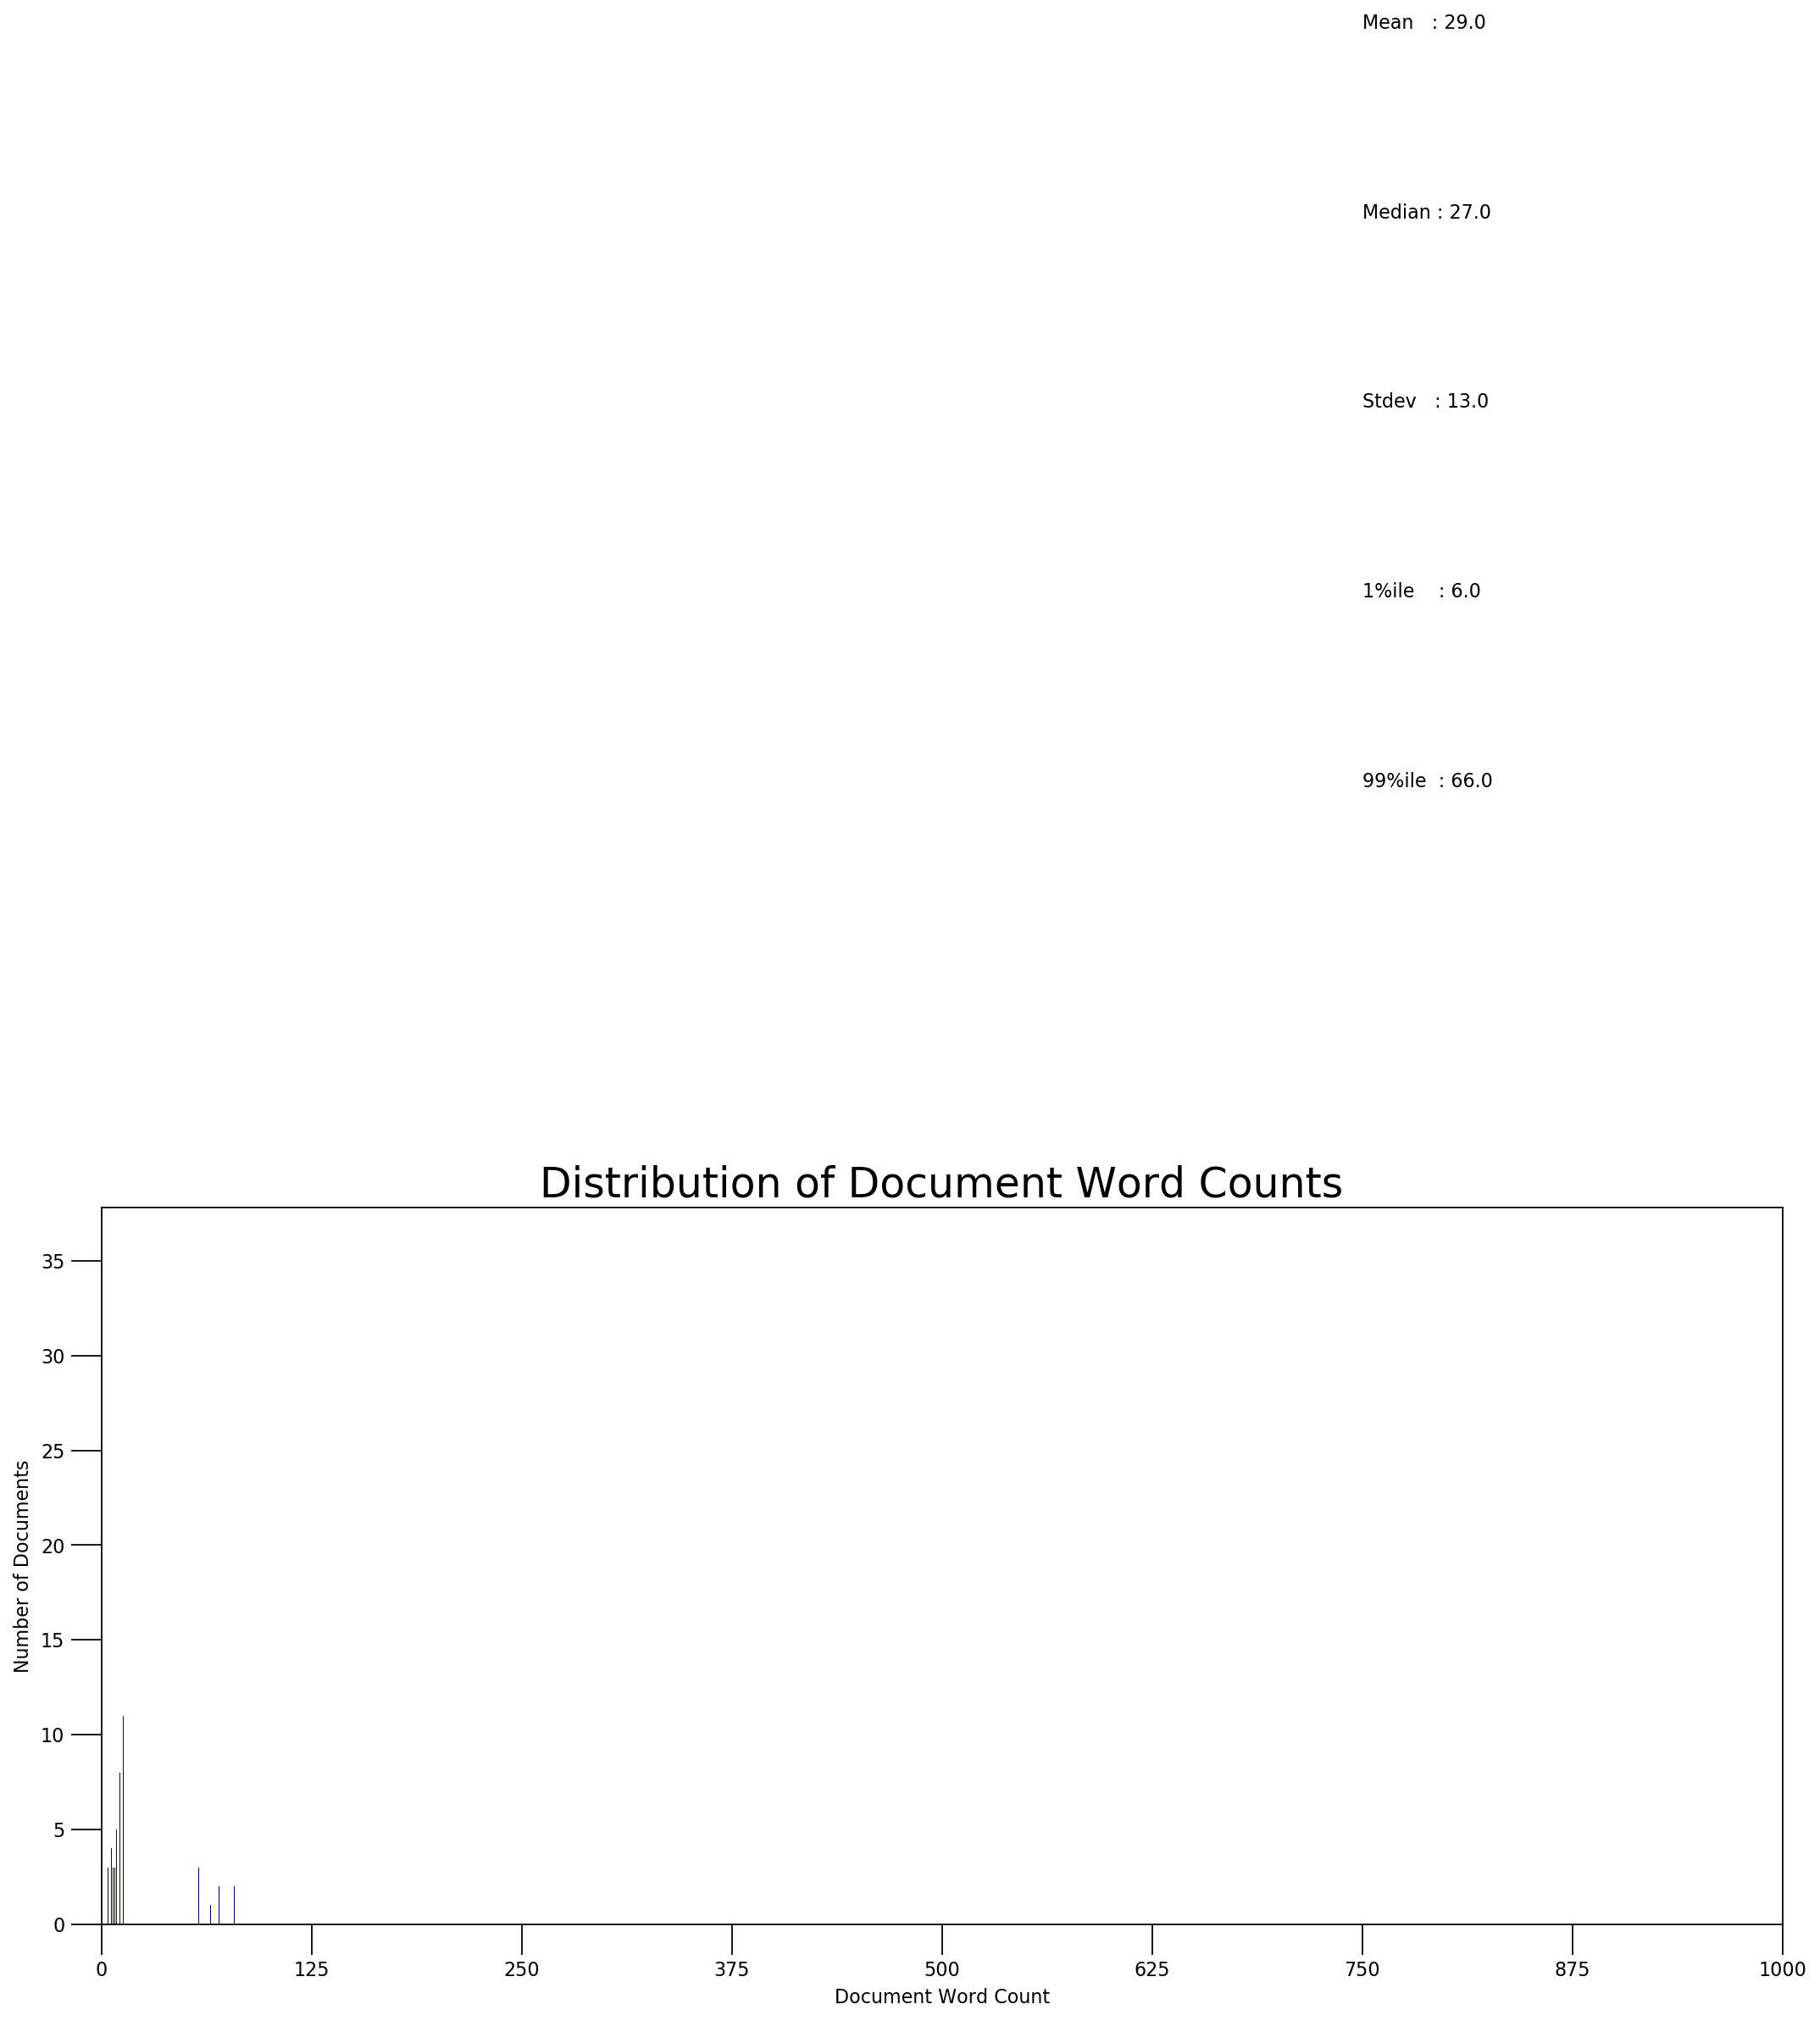

In [47]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 100), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



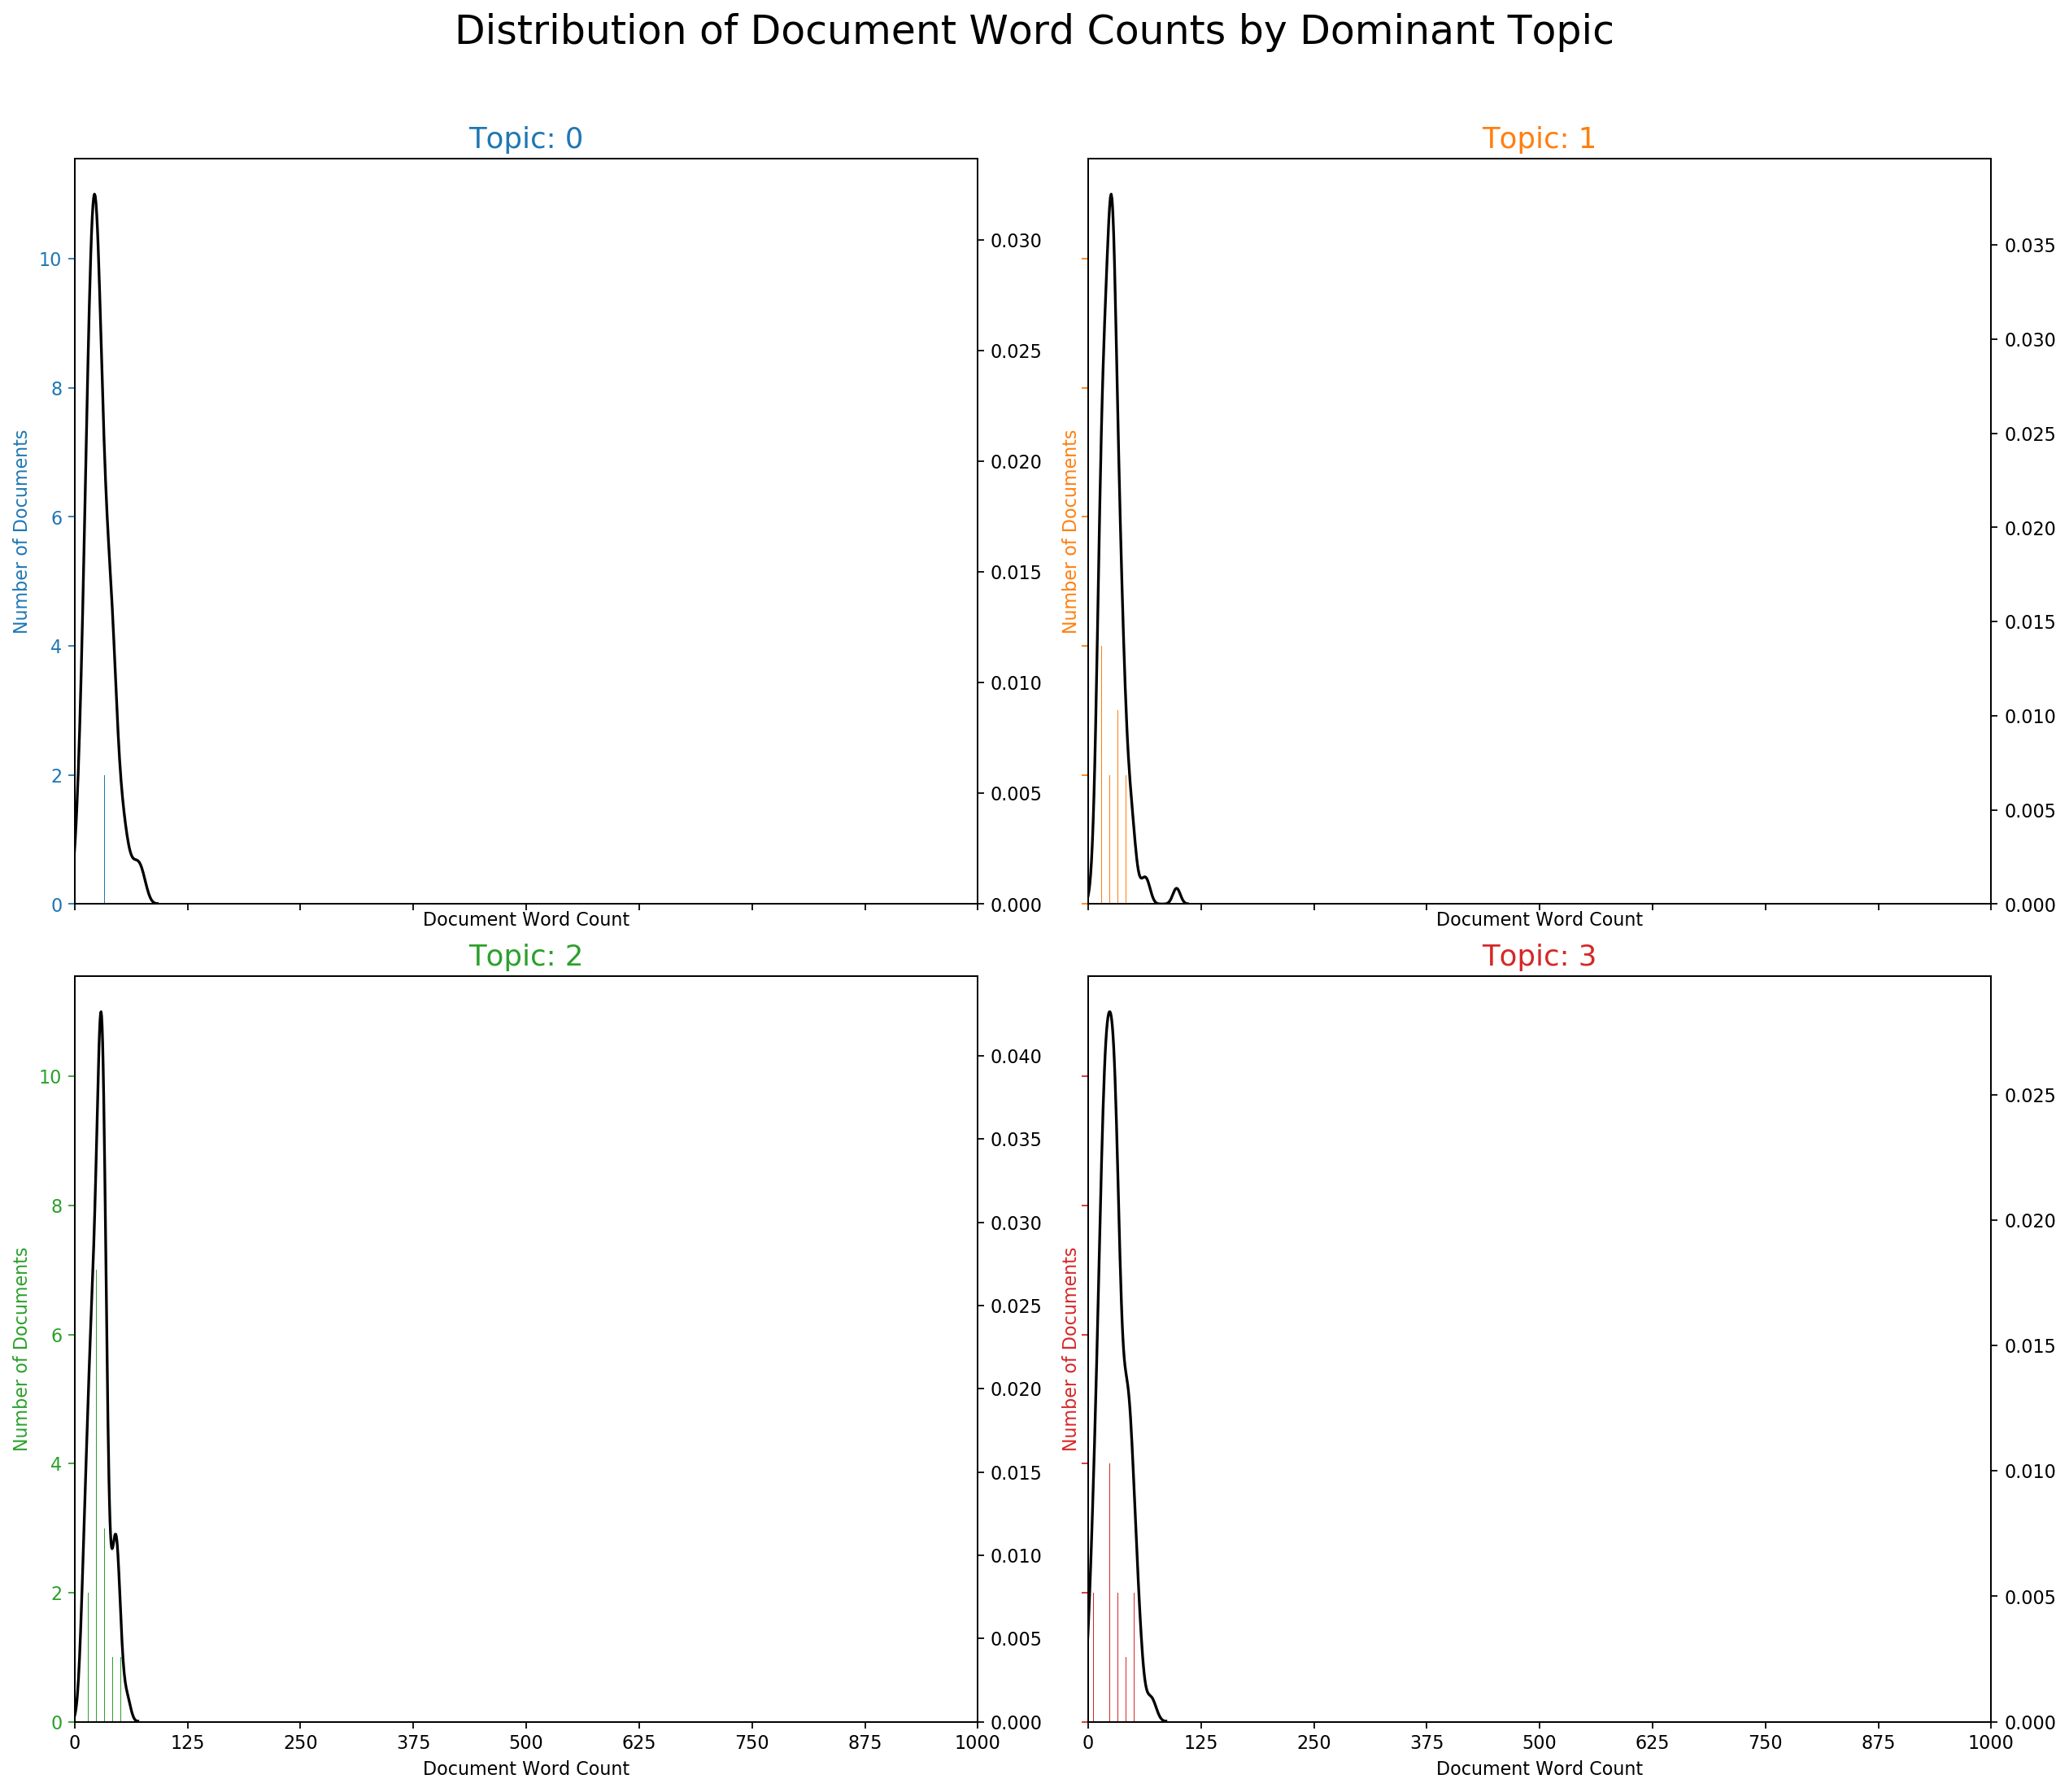

In [48]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

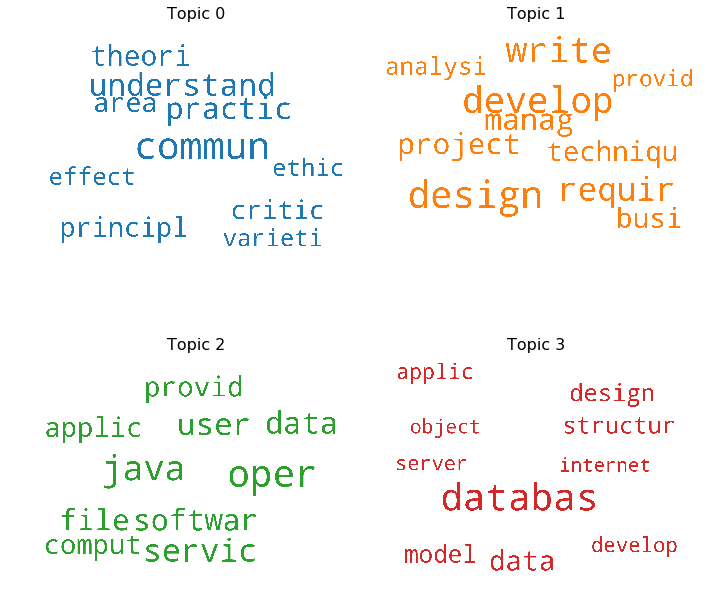

In [49]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

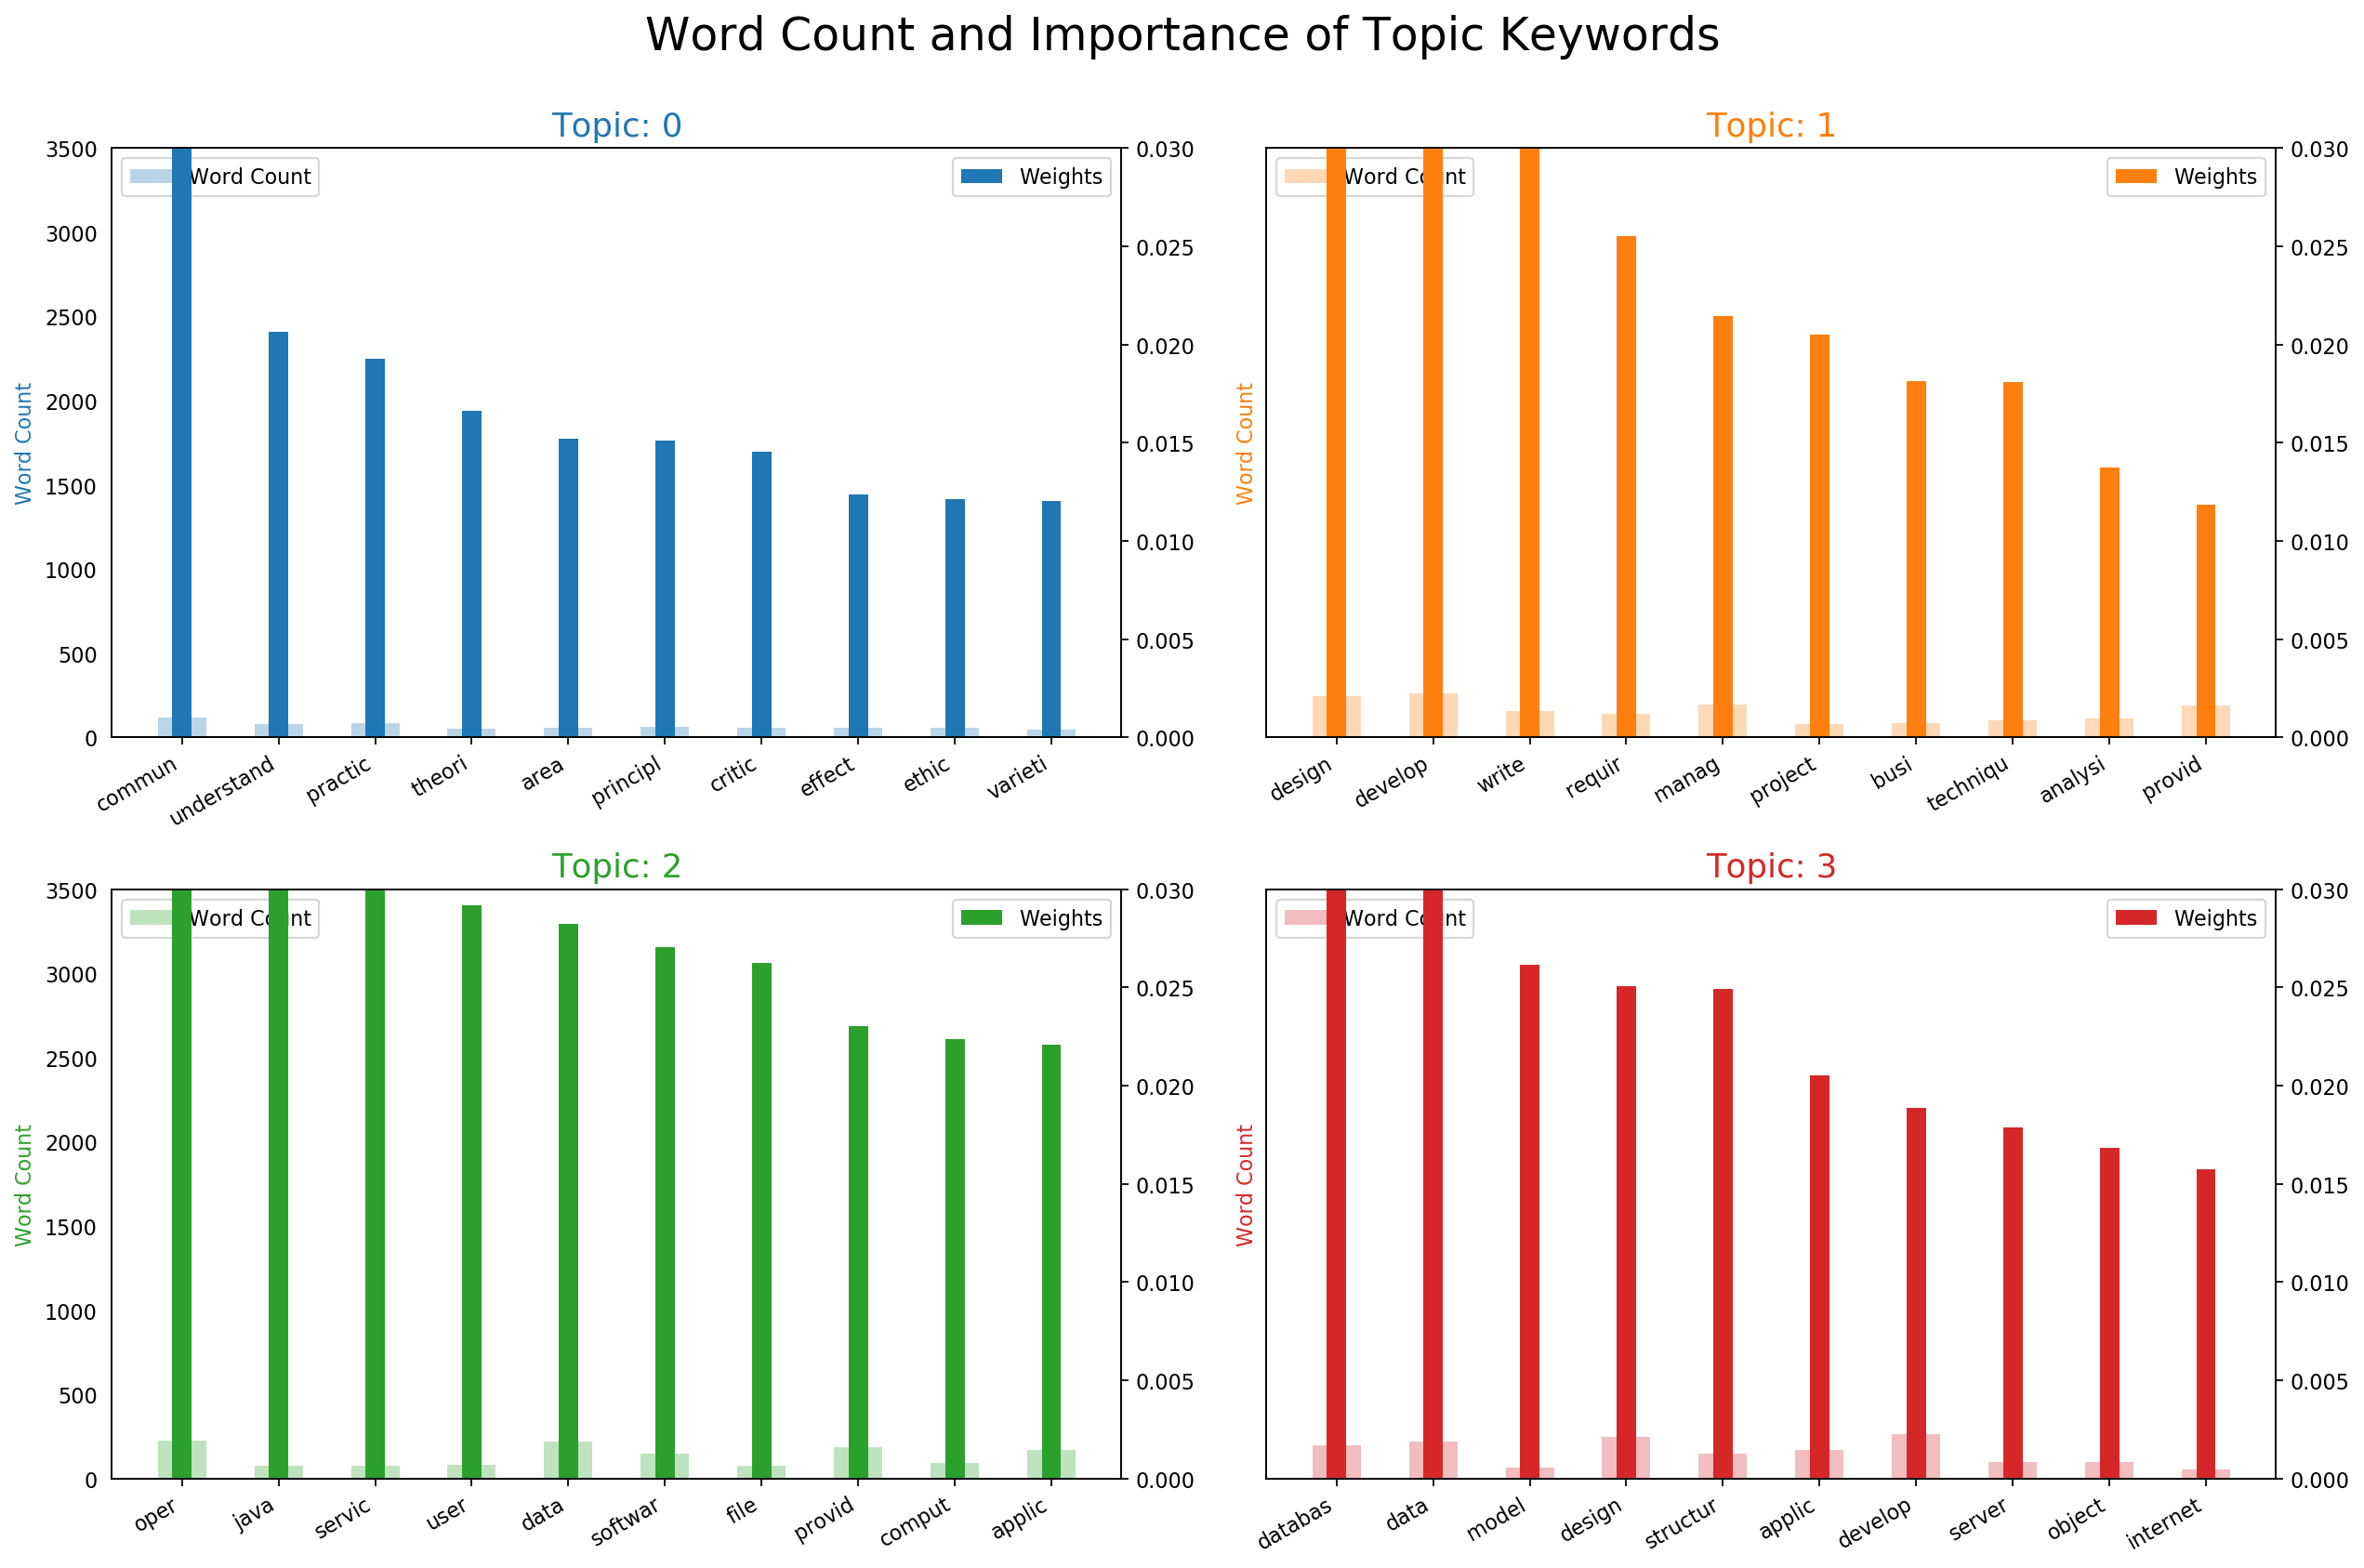

In [50]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_words for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

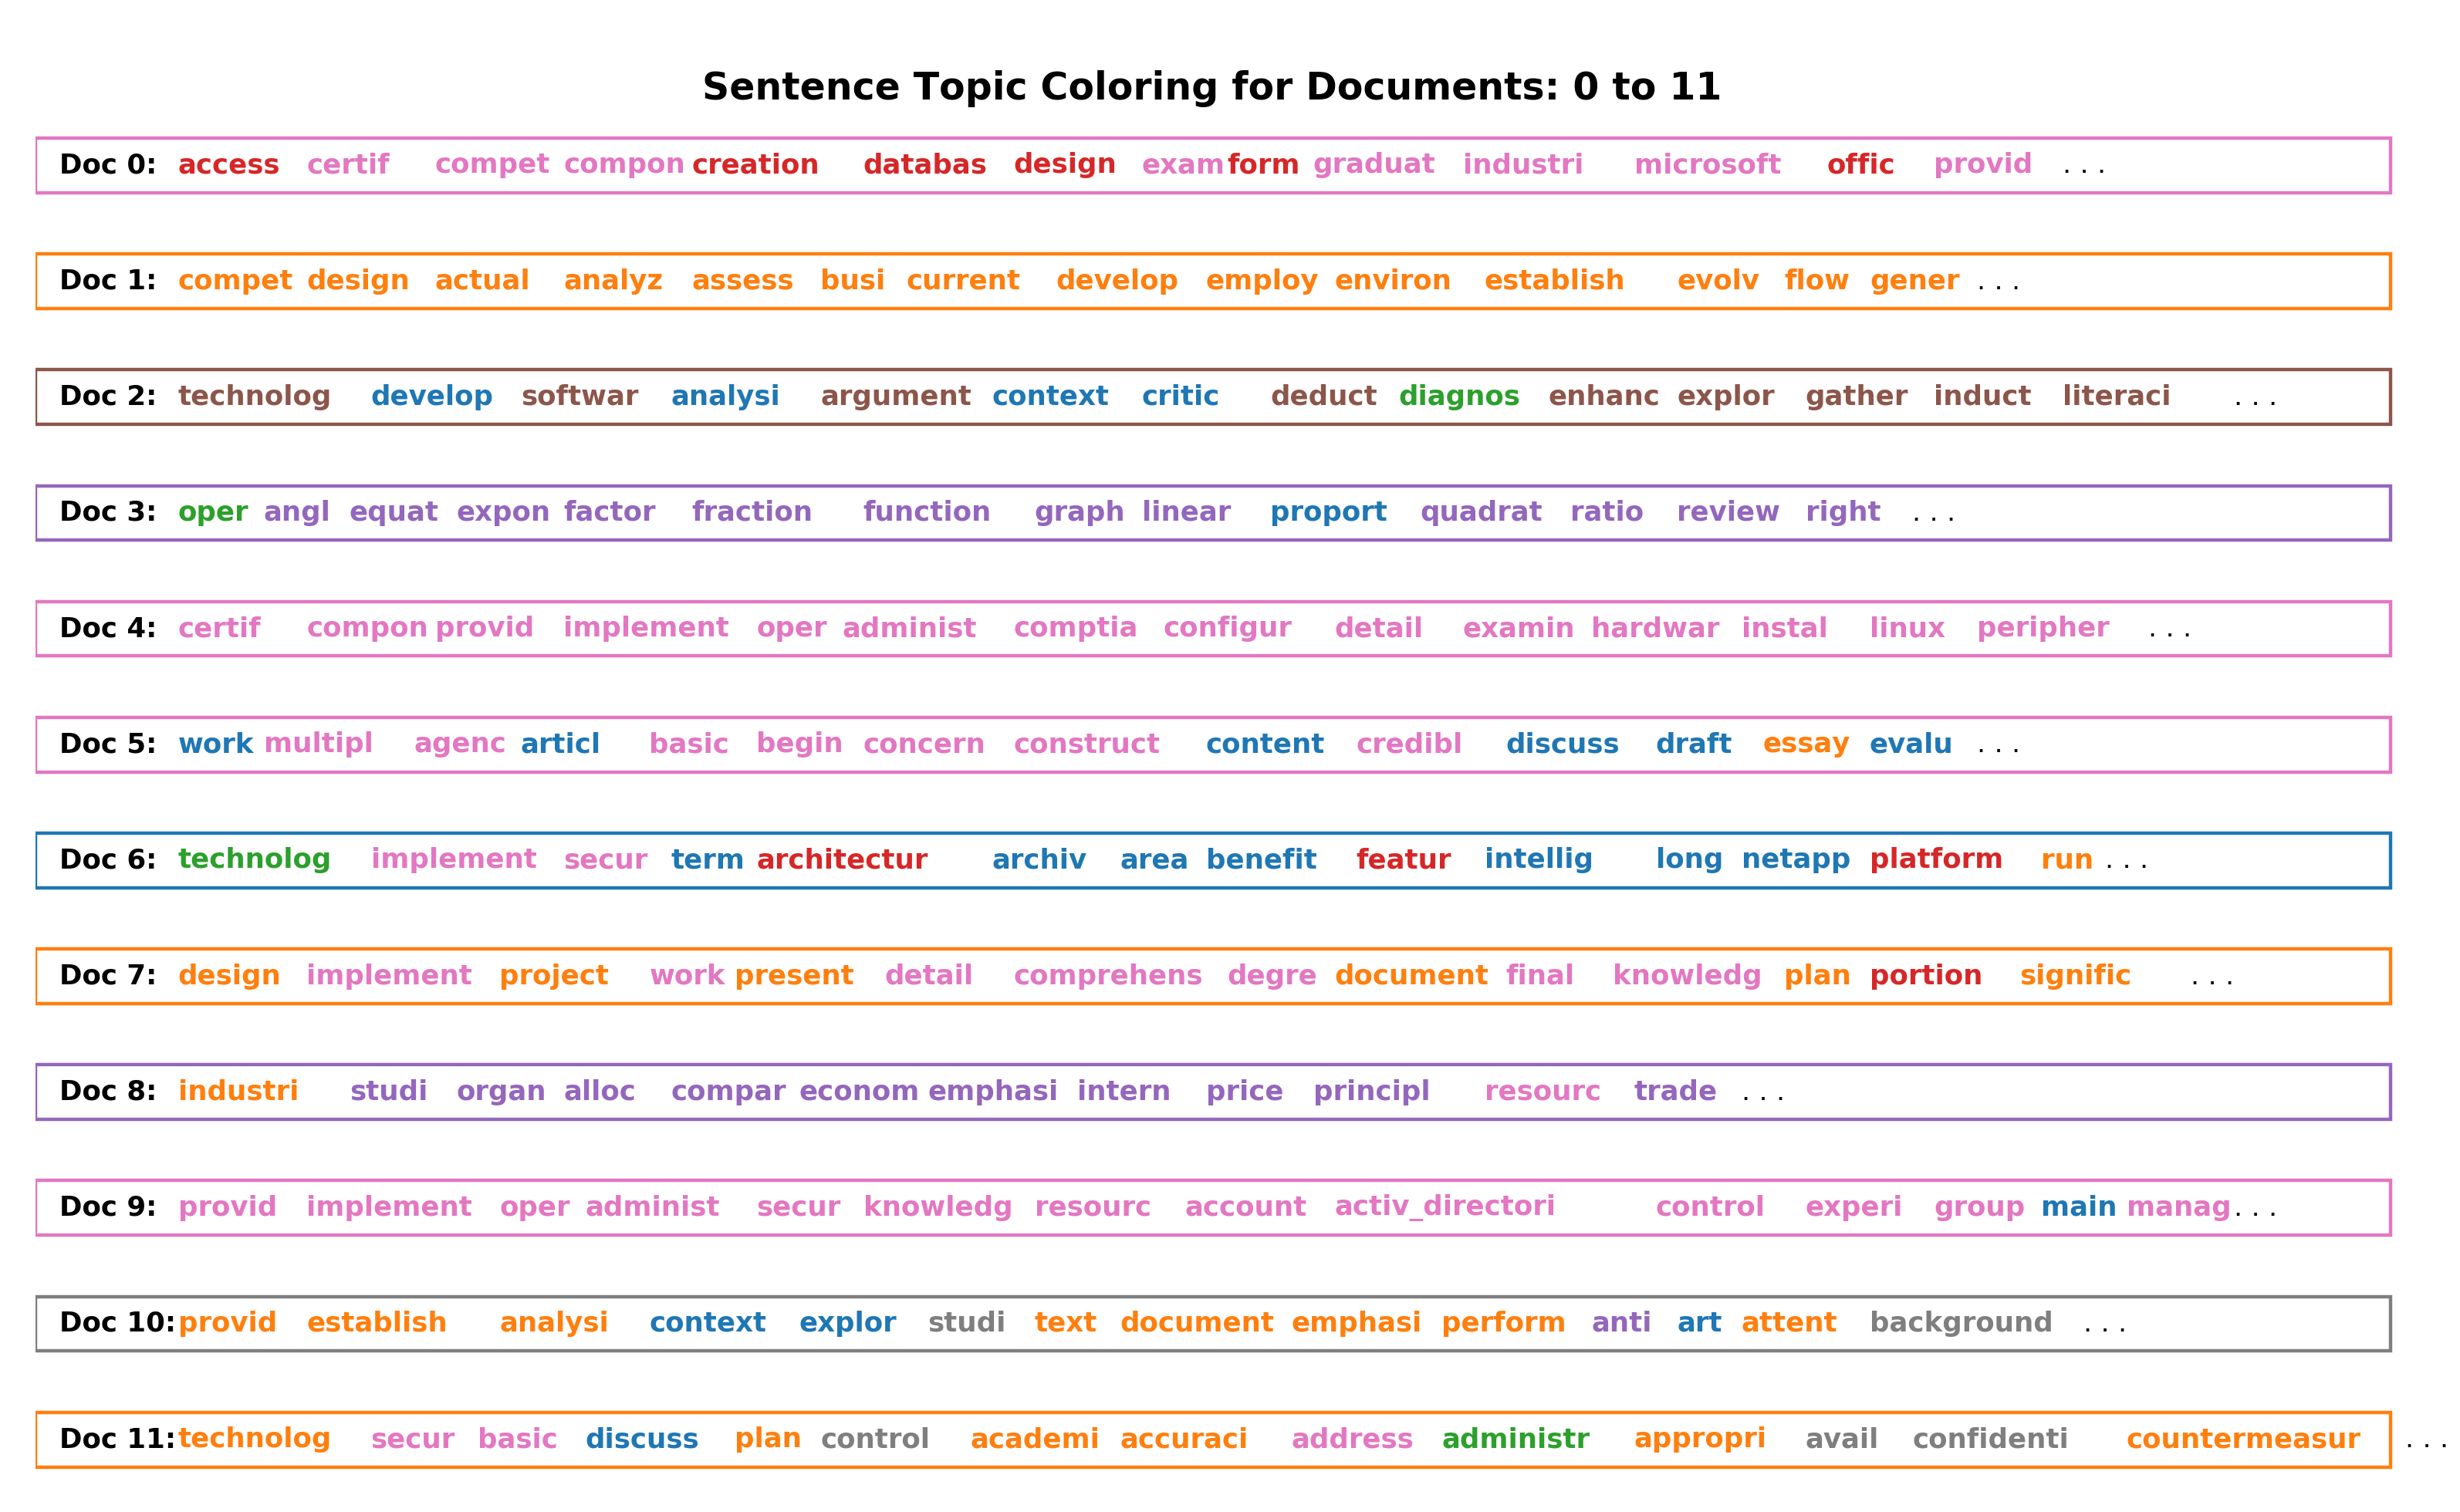

In [51]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()    

In [52]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

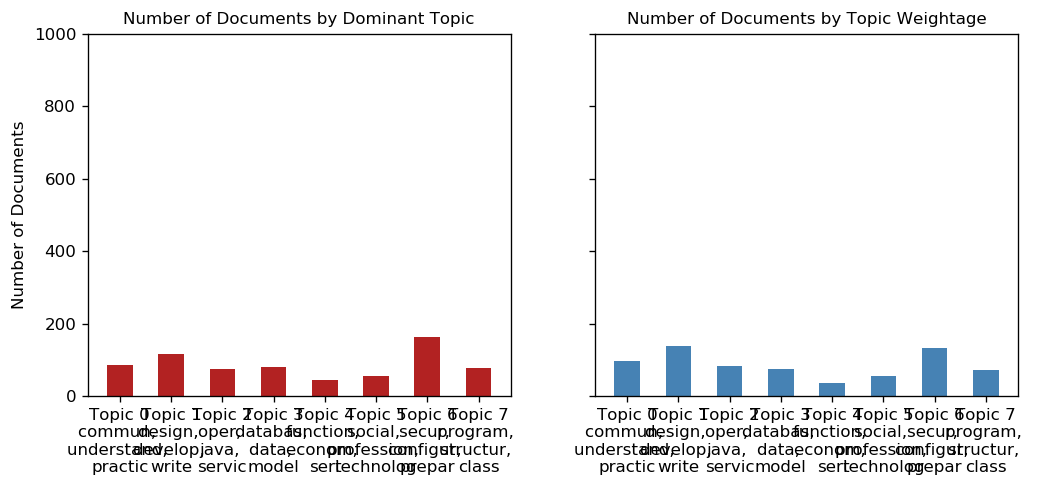

In [106]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [107]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 626 samples in 0.000s...
[t-SNE] Computed neighbors for 626 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 626 / 626
[t-SNE] Mean sigma: 0.134930
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.058933
[t-SNE] Error after 1000 iterations: 0.442817


Loading BokehJS ...

In [108]:
for index, score in sorted(lda_model[corpus_wp], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

ValueError: too many values to unpack (expected 2)

In [ ]:
print(vector)

In [ ]:
print(corpus_wp[0])